In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#### Problem 1 

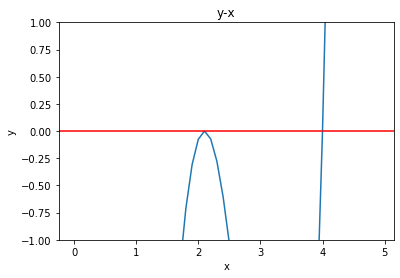

In [2]:
def f(x):
    return x ** 4 - 6.4 * x ** 3 + 6.45 * x ** 2 + 20.538 * x -31.752

x = np.arange(0 , 5 ,0.1)
y = f(x)
plt.plot(x, y, label = 'zero of even function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y-x')
plt.axhline(y=0,color='red')
plt.ylim(-1,1)
plt.show()

In [3]:
def solution(f,eps):
    x2 = 2
    f_x2 = f(x2)
    x1 = x2 + 0.00001
    f_x1 = f(x1)
    while f_x2 * f_x1 > 0:
        x1 += 0.00001
        f_x1 =f(x1)  
    iteration_counter = 0
    while abs(x1-x2) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x2)/(x1 - x2)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x2)
            sys.exit(1)
        x2 = x1
        x1 = x
        f_x2 = f(x2)
        f_x1 = f(x1)
        iteration_counter = iteration_counter + 1
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x 

In [4]:
x0=solution(f,1e-10)
x0

2.100000000000655

### Problem 2

In [5]:
def matrix_A(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j :
                A[i][j] = 2
            if j == i - 1 or j == i + 1:
                A[i][j] = -1
    return A

In [6]:
print(matrix_A(5))

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


### Problem 4

In [7]:
L = np.array([[1, 0, 0],
              [3/2, 1, 0],
              [1/2, 11/13, 1]])
U = np.array([[2, -3, -1],
              [0, 13/2, -7/2],
              [0, 0, 32/13]])
b = np.array([[1],[-1],[2]])

In [8]:
p = np.dot(np.linalg.inv(L),b)
matrix_x = np.dot(np.linalg.inv(U),p)
print(matrix_x)

[[1.84375]
 [0.40625]
 [1.46875]]


### Problem 6

In [9]:
def matrix_A(N):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i == j :
                A[i][j] = 2
            if j == i - 1 or j == i + 1:
                A[i][j] = -1
    return A

In [51]:
def iterEqs(x,omega):
    l = len(x)
    for i in range(l):
        if i == 0:
            x[0] = omega * (x[1] - x[-1]) / 2 + (1 - omega) * x[0]
        elif i != 0 and i != l-1:
            x[i] = omega * (x[i - 1] + x[i + 1]) / 2 + (1 - omega) * x[i]
        elif i == l-1:
            x[l-1] = omega * (1 - x[0] + x[-2]) / 2 + (1 - omega) * x [-1]      
    return x

In [52]:
def gaussSeidel(iterEqs,x,tol = 1.0e-9):
    omega = 1.0
    k = 10
    p = 1
    for i in range(1,501):
        xOld = x.copy()
        x = iterEqs(x,omega)
        dx = math.sqrt(np.dot(x-xOld,x-xOld))
        if dx < tol: return x,i,omega
        # Compute relaxation factor after k+p iterations
        if i == k: dx1 = dx
        if i == k + p:
            dx2 = dx
            omega = 2.0/(1.0 + math.sqrt(1.0 \
                - (dx2/dx1)**(1.0/p)))
    print('Gauss-Seidel failed to converge')


In [53]:
A = matrix_A(20)
x = np.zeros(20)
gaussSeidel(iterEqs,x,tol = 1.0e-9)

(array([-4.50000000e+00, -4.00000000e+00, -3.50000000e+00, -3.00000000e+00,
        -2.50000000e+00, -2.00000000e+00, -1.50000000e+00, -9.99999997e-01,
        -4.99999998e-01,  2.14046747e-09,  5.00000002e-01,  1.00000000e+00,
         1.50000000e+00,  2.00000000e+00,  2.50000000e+00,  3.00000000e+00,
         3.50000000e+00,  4.00000000e+00,  4.50000000e+00,  5.00000000e+00]),
 259,
 1.7054523107131407)